**Customer Churn Notebook**


#**Data Analysis**

In [1]:
# Data Exploration Steps
# Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick
sns.set()

In [2]:
# Import files
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Check basic information
print(df.head())
df.isnull().any()
df.shape
df.columns
df.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
lc = [x for x in df.columns if df.columns.isna().any()]
print(lc)
round(df.describe())

[]


,SeniorCitizen,tenure,MonthlyCharges
count,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0
std,0.0,25.0,30.0
min,0.0,0.0,18.0
25%,0.0,9.0,36.0
50%,0.0,29.0,70.0
75%,0.0,55.0,90.0
max,1.0,72.0,119.0


Text(0.5, 1.02, 'Count of Target Variable Per Category')

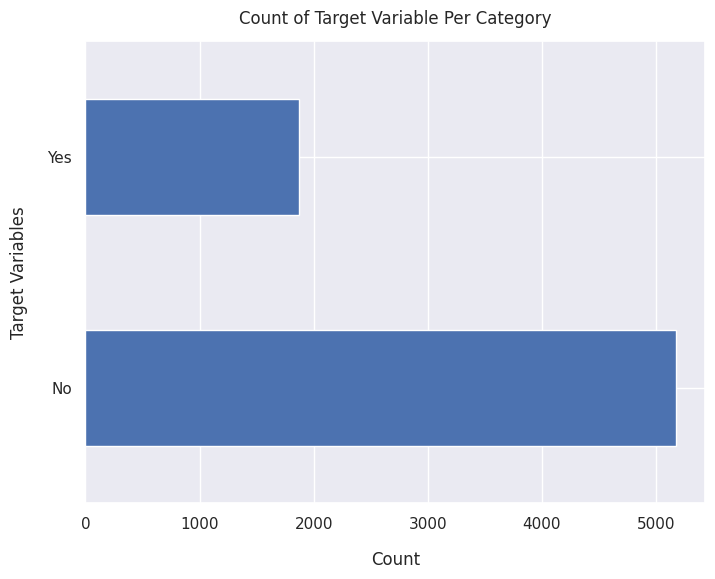

In [5]:
# Checking on the variable of our interest
df['Churn'].value_counts().plot( kind = 'barh', figsize=(8,6))
plt.xlabel( 'Count', labelpad=14)
plt.ylabel( 'Target Variables', labelpad=14)
plt.title( 'Count of Target Variable Per Category', y = 1.02 )
# plt.show()

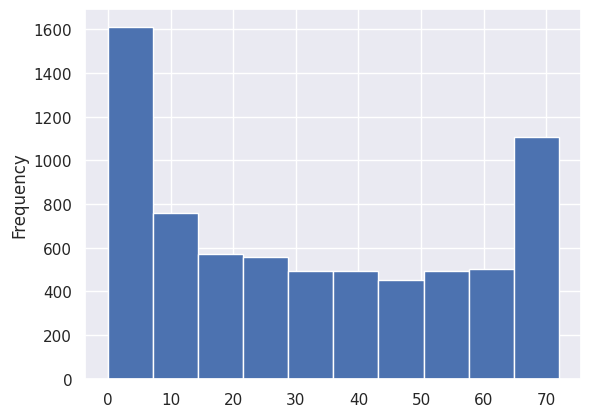

In [6]:
# Data Clearning 
telco_data = df.copy()

telco_data['TotalCharges'].dtypes

telco_data['TotalCharges'] = pd.to_numeric(telco_data.TotalCharges, errors = 'coerce' )
telco_data[telco_data['TotalCharges'].isnull() == True]

telco_data['TotalCharges'].describe()   # Check the values here
telco_data['TotalCharges'].median()     # Median makes more sense since there are some outliers

telco_data['TotalCharges'].fillna( telco_data['TotalCharges'].median(), inplace=True)

telco_data['TotalCharges'].isna().any()

telco_data['tenure'].plot(kind = 'hist')
plt.show() # Check the dist of tenure 

In [7]:
telco_data['tenure'].max()
labels = [ '{} - {}'.format(i, i + 11) for i in range(1, 72, 12)]
telco_data['tenure_group'] = pd.cut(telco_data['tenure'], range(1, 80, 12), right=False, labels=labels)
telco_data['tenure_group'].value_counts(sort=True)
telco_data.drop(columns=['tenure','customerID'], axis = 1, inplace=True) # Remove unwanted columns 
telco_data.columns # Check the columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

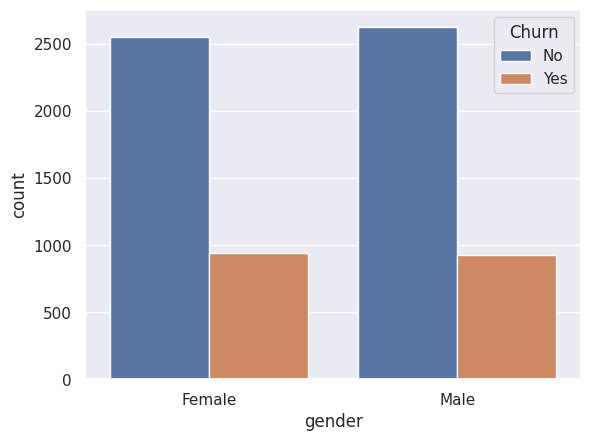

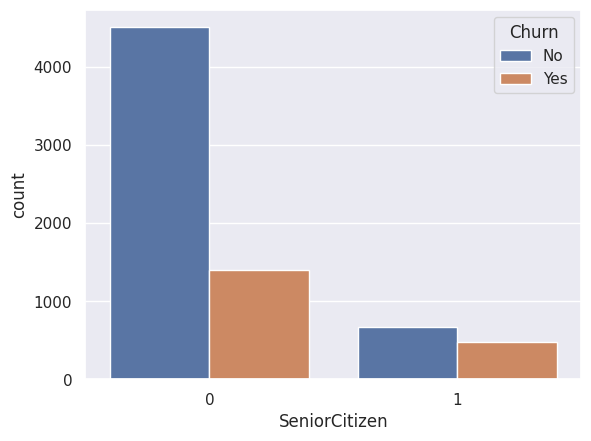

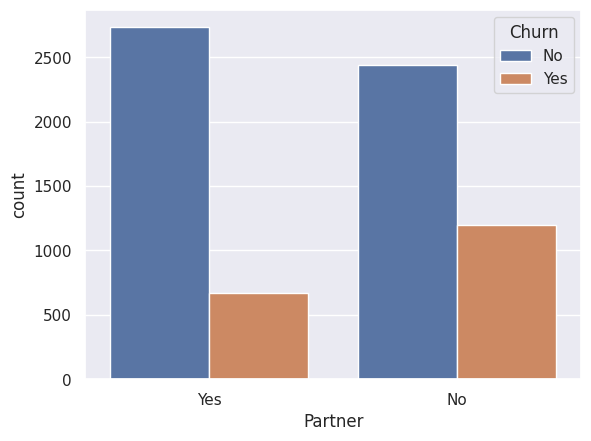

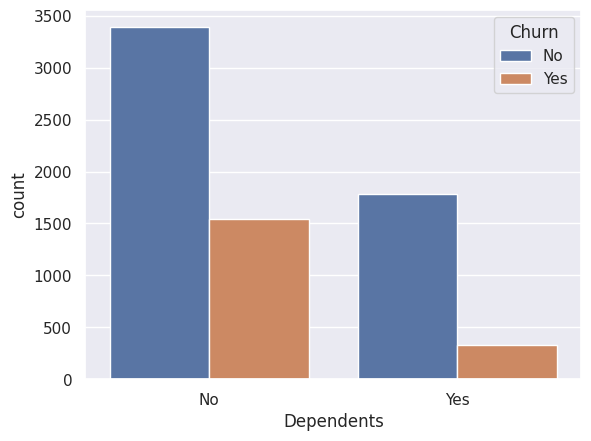

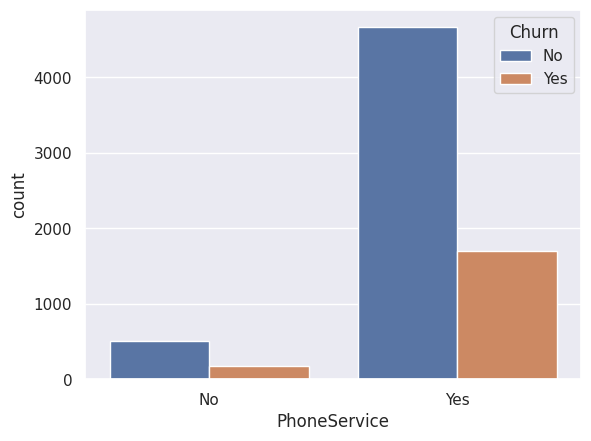

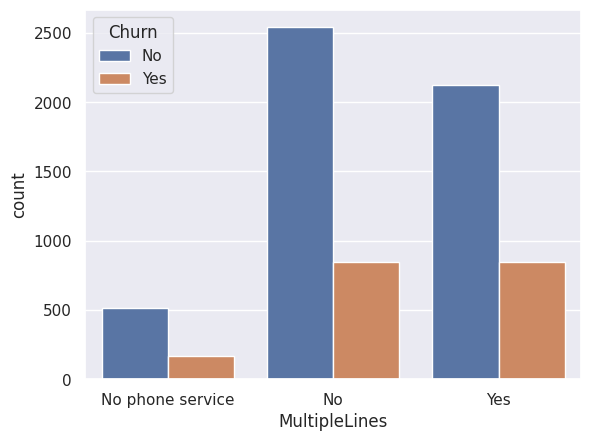

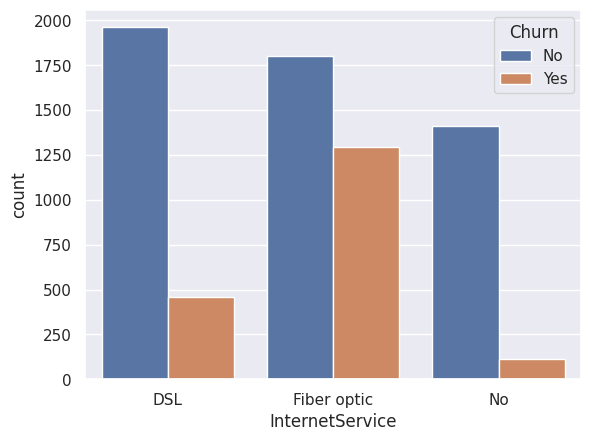

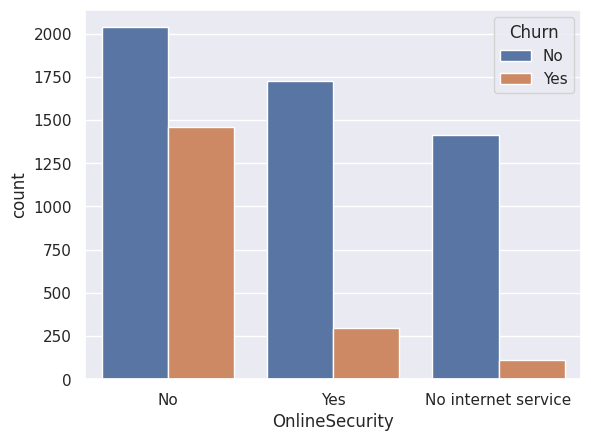

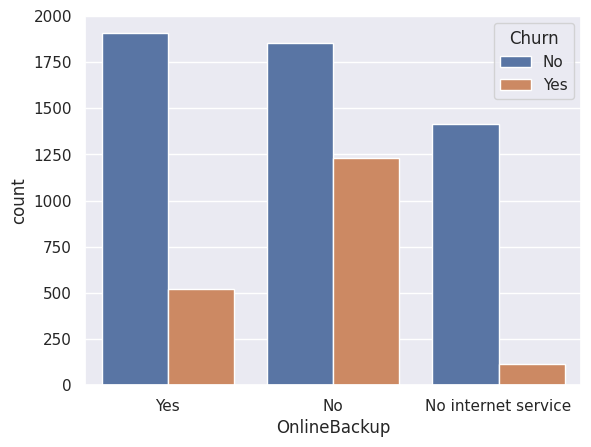

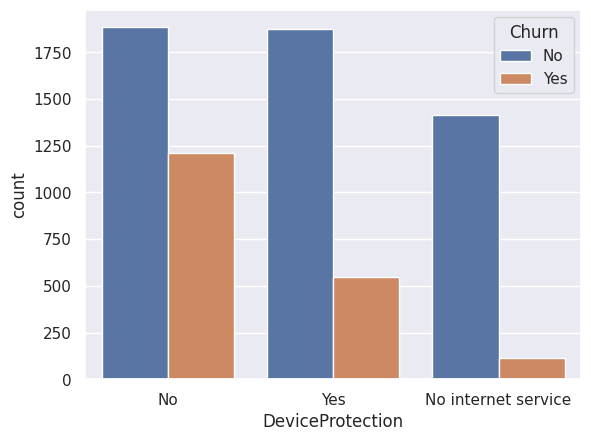

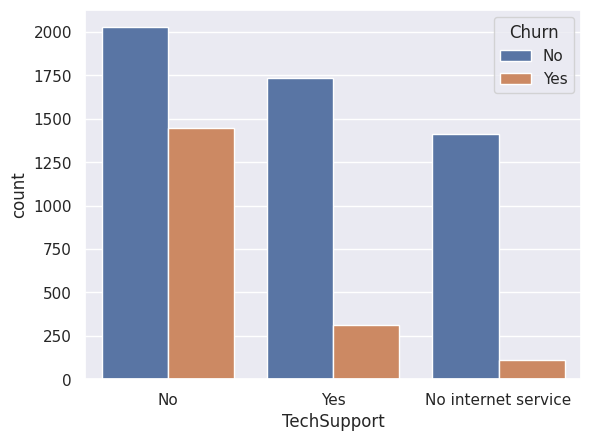

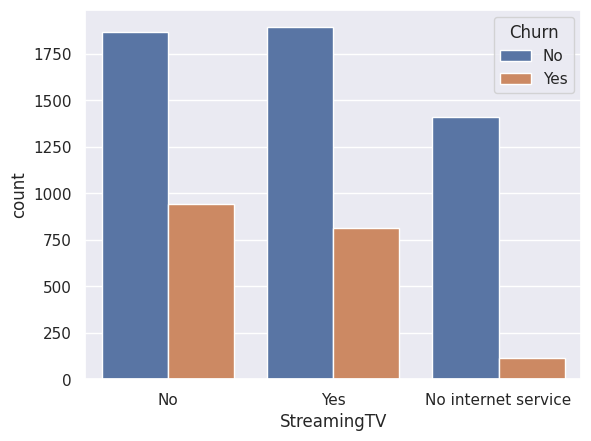

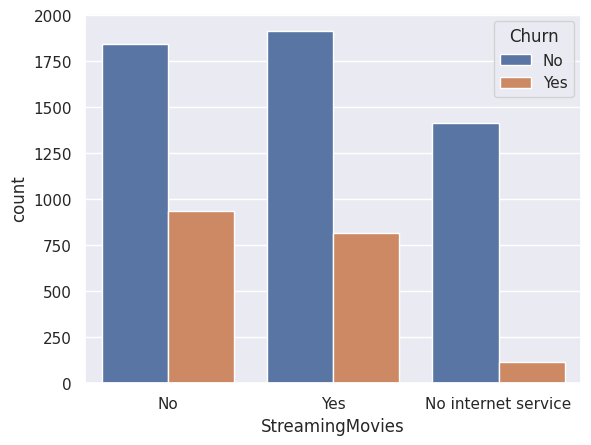

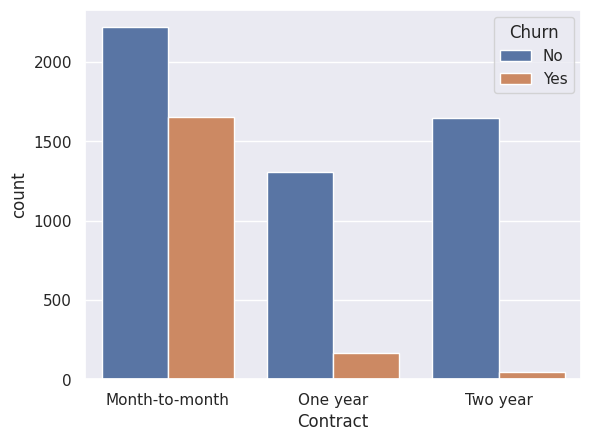

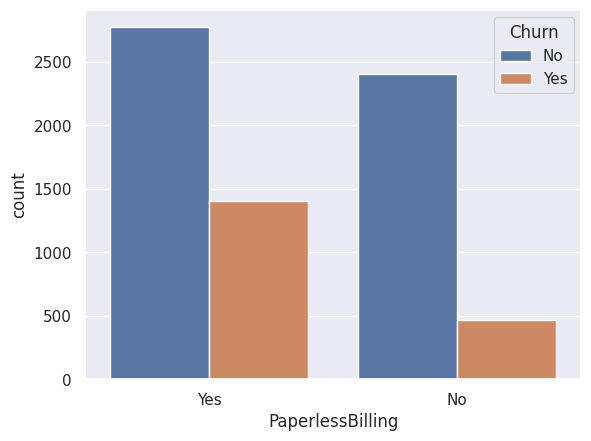

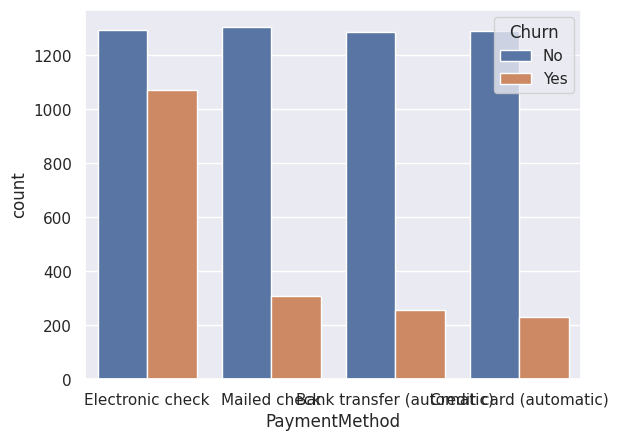

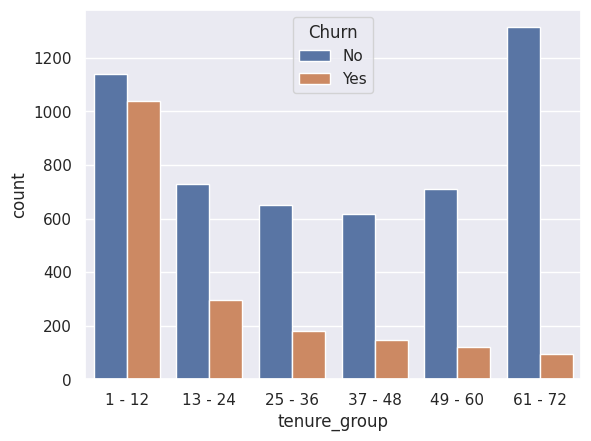

In [8]:
# Data Exploration 
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_data, x = predictor, hue = 'Churn')
    plt.show()

In [9]:
telco_data['Churn'] = telco_data['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)
telco_data['Churn'].value_counts()
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [10]:
telco_data_dummies = pd.get_dummies(telco_data, dtype=float) # Convert all categorical variables into dummy vars
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,56.95,1889.50,0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,53.85,108.15,1,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,42.30,1840.75,0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,70.70,151.65,1,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


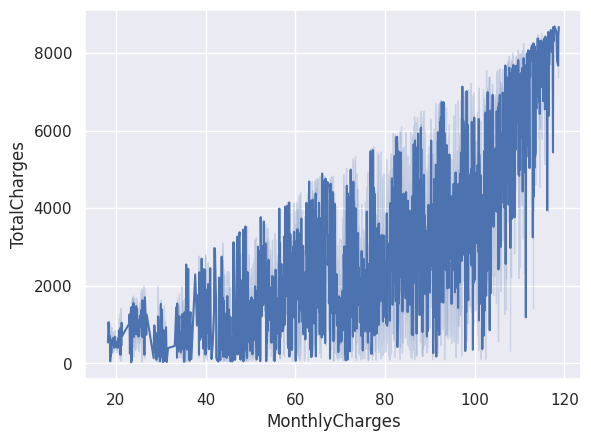

In [12]:
# Relationship between Monthly Charges and Total Charges
sns.lineplot(data = telco_data_dummies, x = 'MonthlyCharges', y ='TotalCharges')
plt.show()
# Total charges increase as monthly charges increase - as expected

<ipython-input-13-3f8454225a98>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-13-3f8454225a98>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


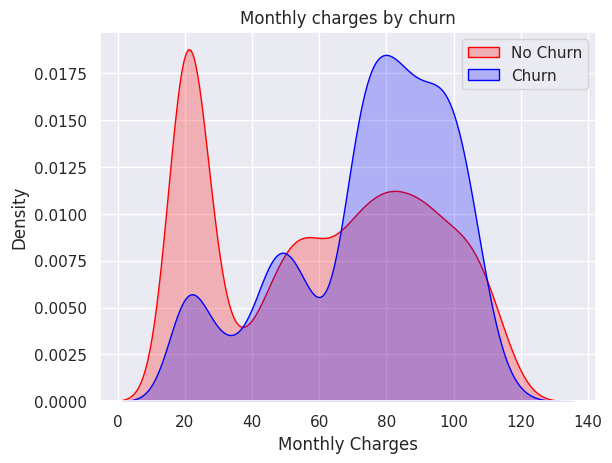

In [13]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

<ipython-input-14-f91b46648ccb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-14-f91b46648ccb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


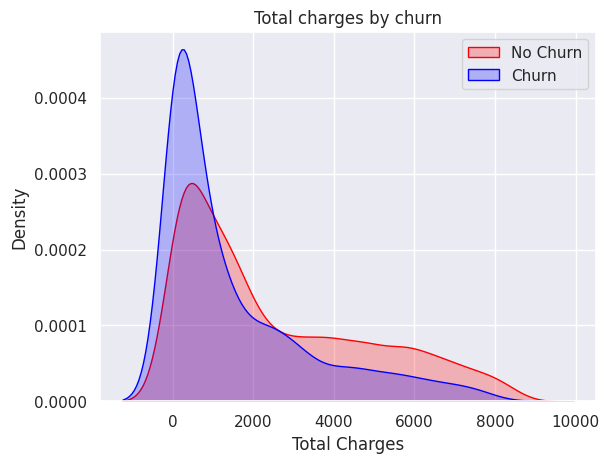

In [14]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

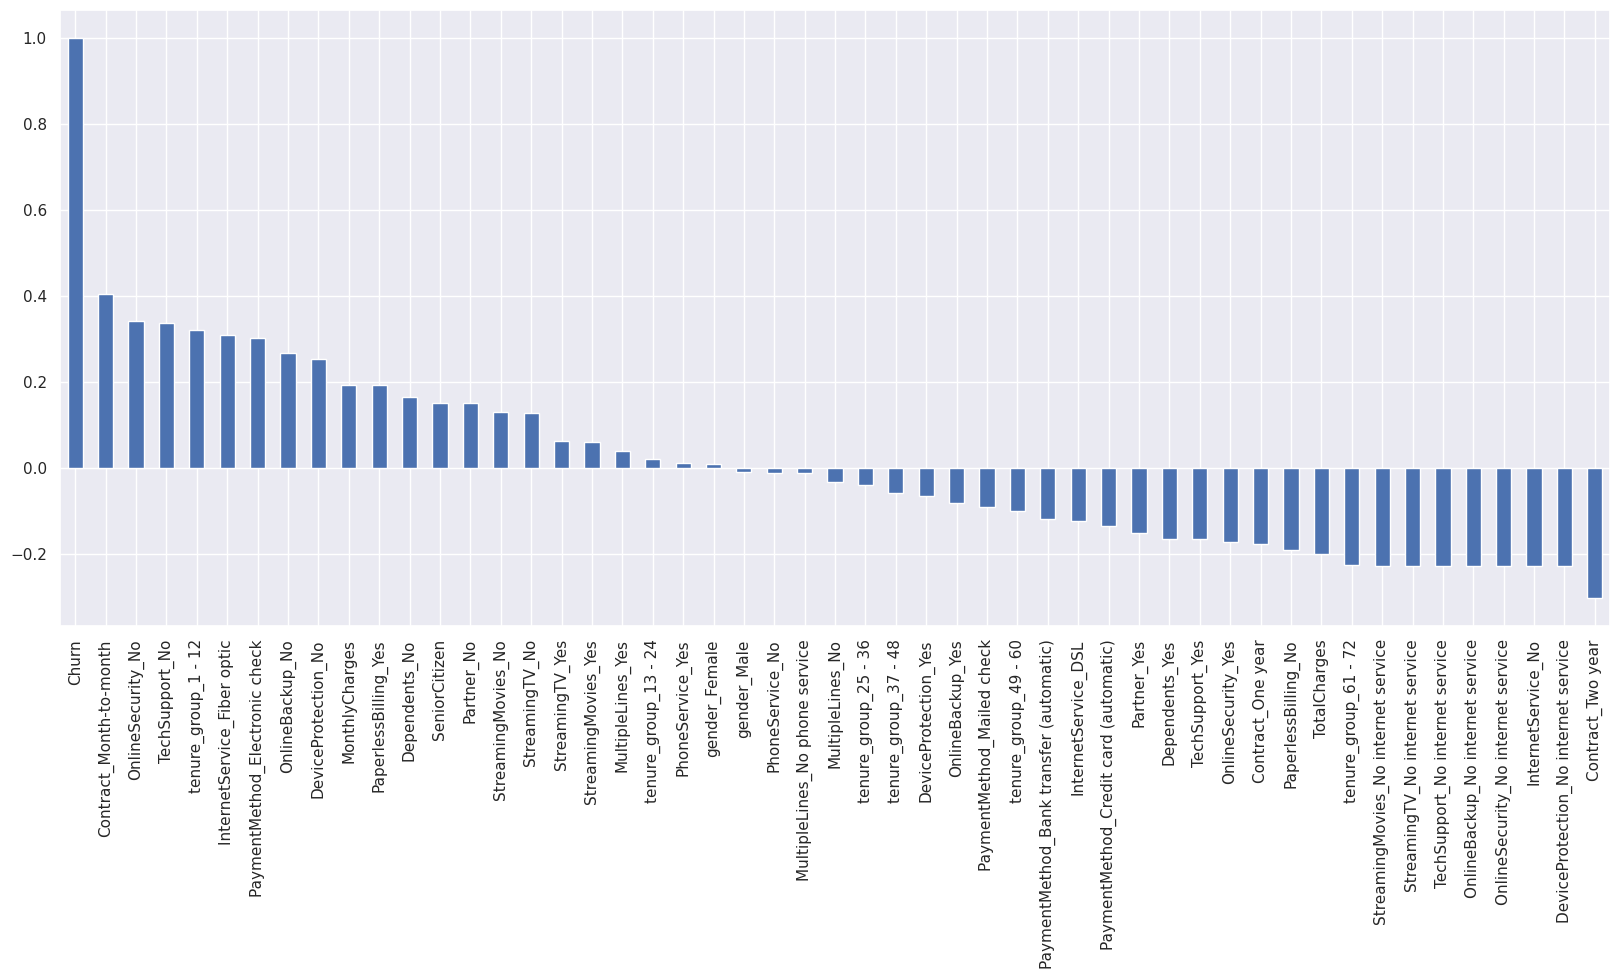

In [15]:
# The total charge is irrelated to churn(Higher Churn Vs. Lower Charges)
plt.figure(figsize = (20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind = 'bar')
plt.show()

In [ ]:
# HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet
# LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years
# Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn
# This is also evident from the Heatmap below

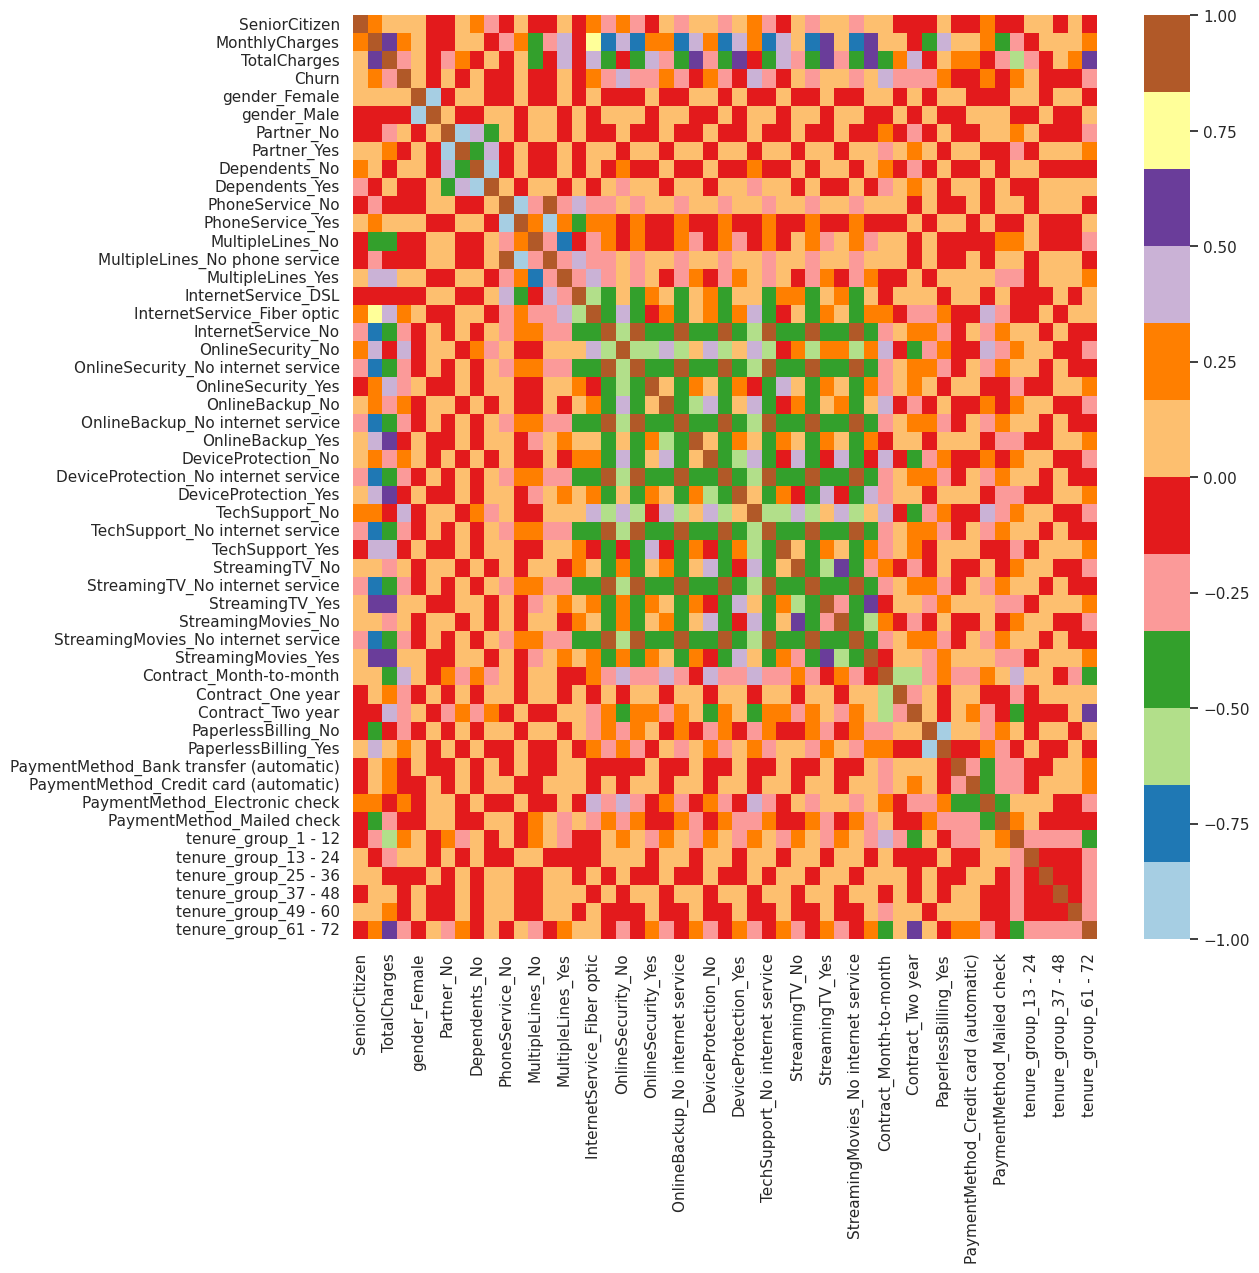

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")
plt.show()

In [20]:
# Bivariate Analysis 
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
        
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 

    #plt.show()

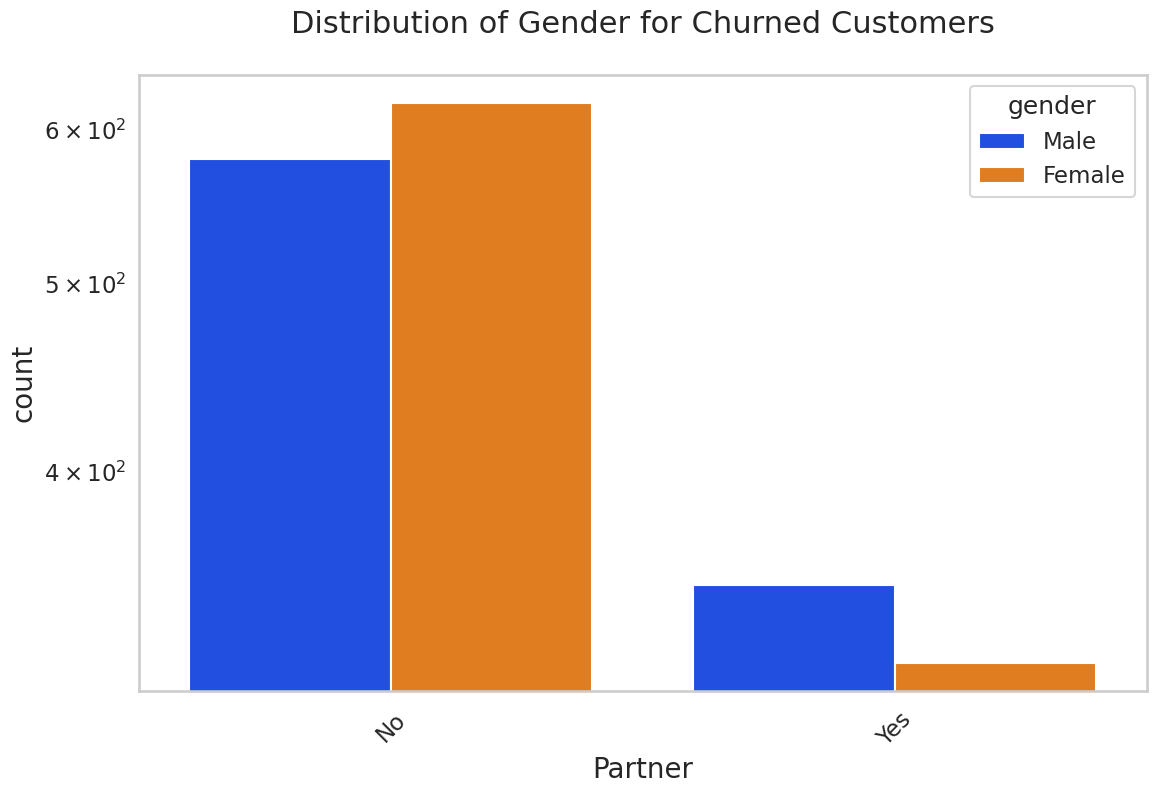

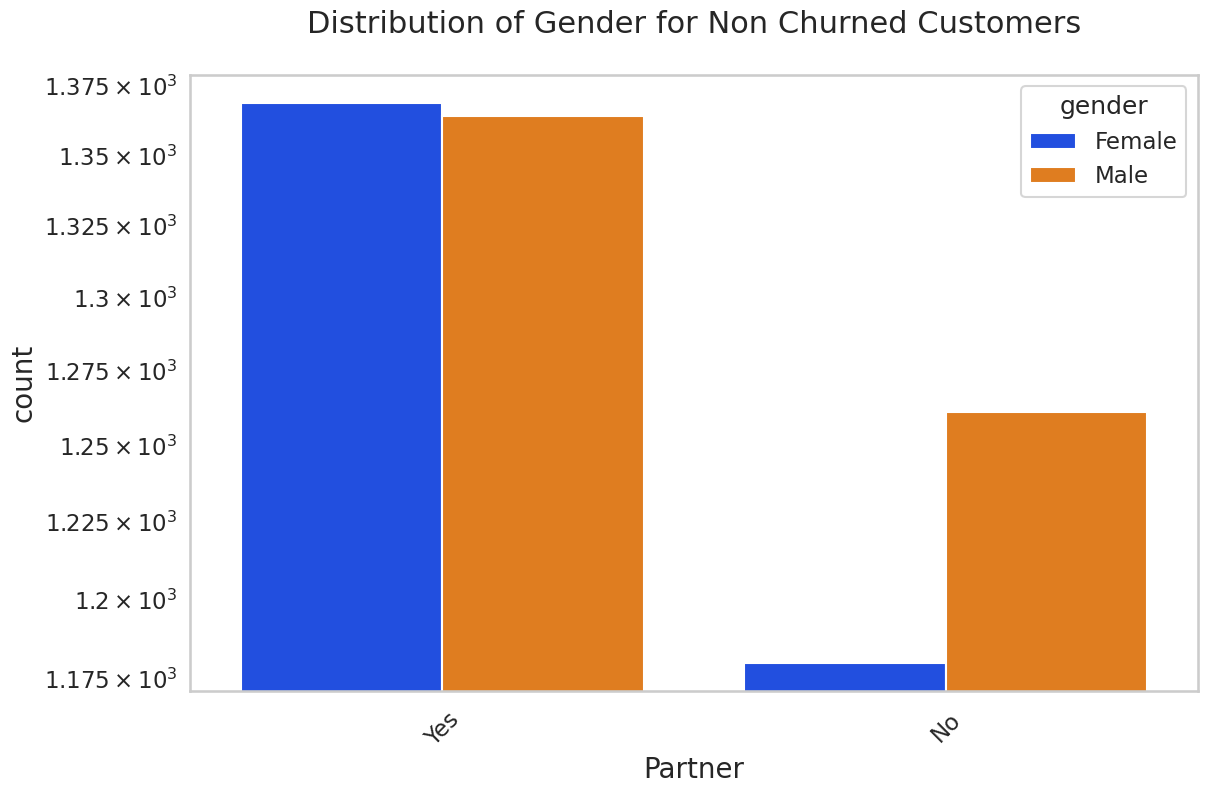

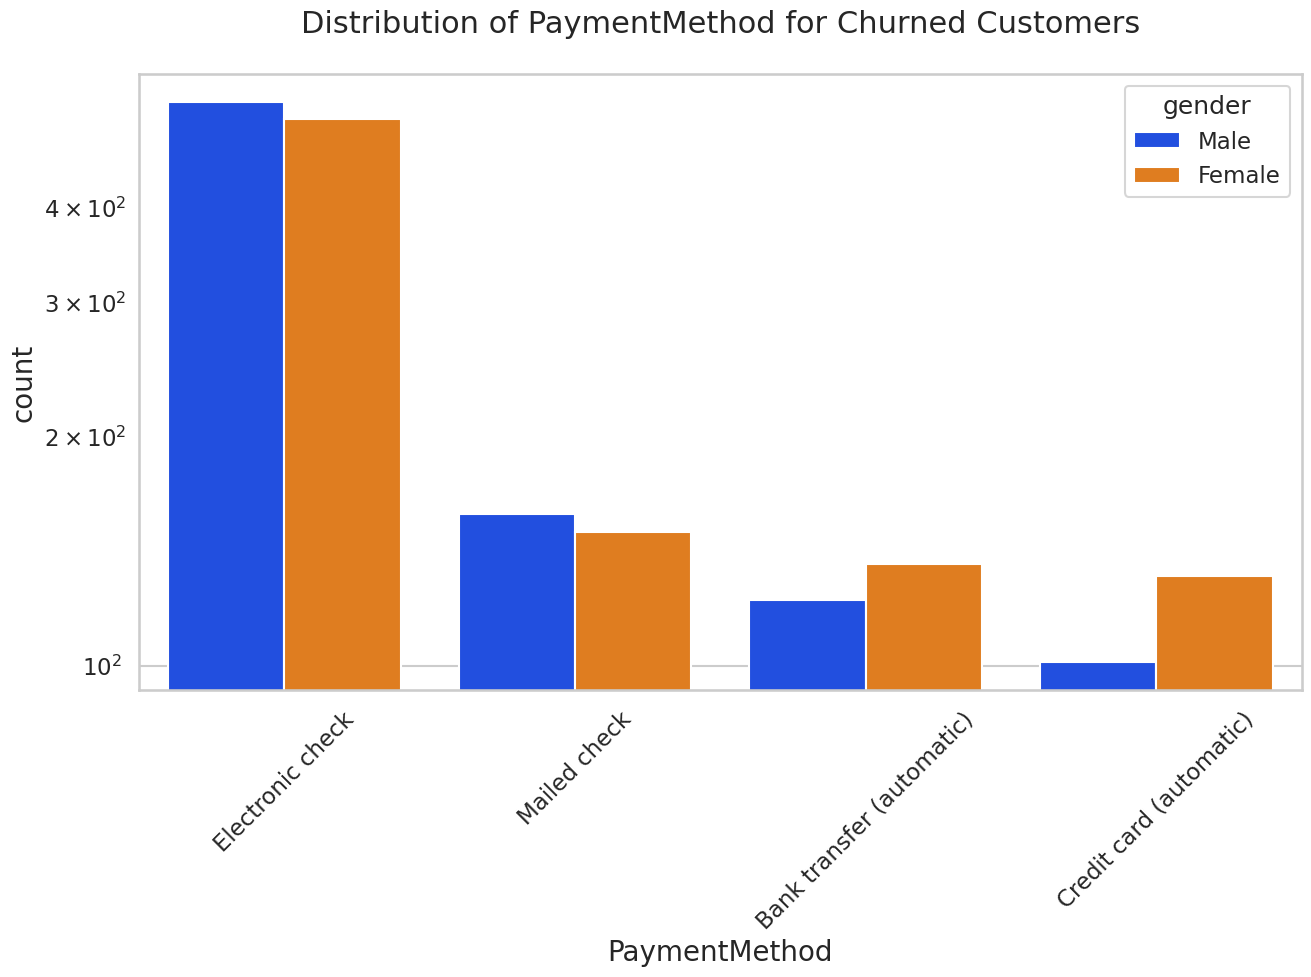

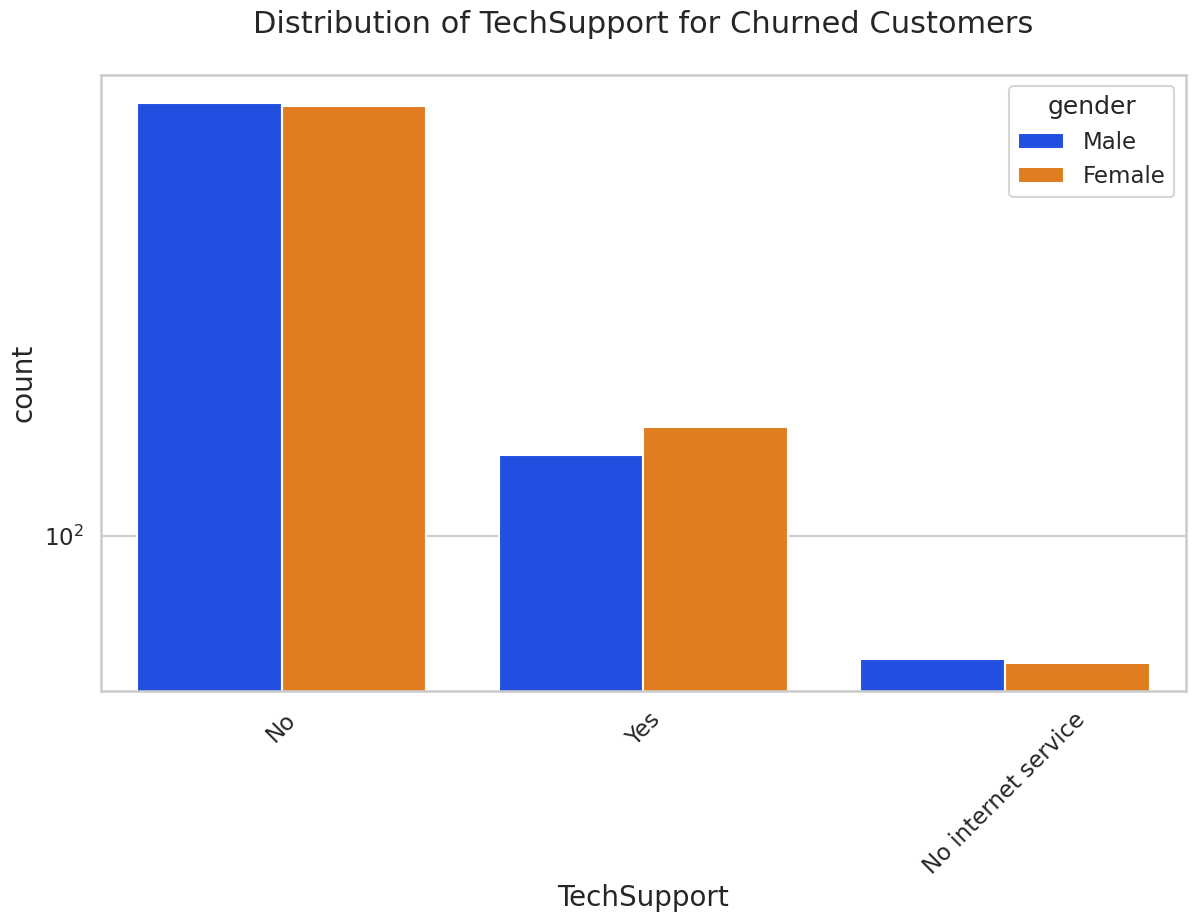

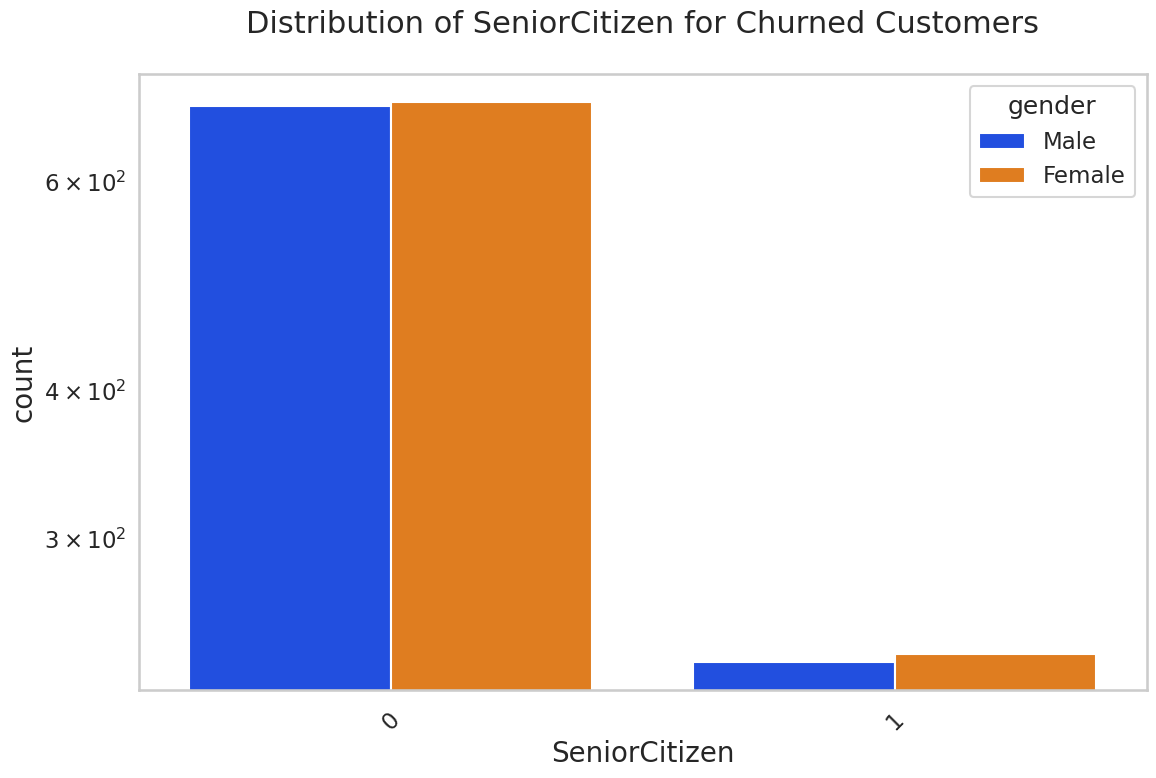

In [24]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')
# plt.show()

uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')
# plt.show()

uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')
# plt.show()

uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')
# plt.show()

uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')
# plt.show()


#**Model Building**

In [25]:
# Model Trainings 
# Use naive_bayes model to get a quick result
# Pre cook data for the model

col_index = {}
for i, name in enumerate(telco_data_dummies.columns):
    col_index[name] = i
print(f'here are the indexes for the  {col_index}\n\n')

telco_data_dummies.shape
x_data = telco_data_dummies.drop(telco_data_dummies.columns[3], axis = 1)
x_data.shape

y_data = telco_data_dummies.Churn
y_data.shape

here are the indexes for the  {'SeniorCitizen': 0, 'MonthlyCharges': 1, 'TotalCharges': 2, 'Churn': 3, 'gender_Female': 4, 'gender_Male': 5, 'Partner_No': 6, 'Partner_Yes': 7, 'Dependents_No': 8, 'Dependents_Yes': 9, 'PhoneService_No': 10, 'PhoneService_Yes': 11, 'MultipleLines_No': 12, 'MultipleLines_No phone service': 13, 'MultipleLines_Yes': 14, 'InternetService_DSL': 15, 'InternetService_Fiber optic': 16, 'InternetService_No': 17, 'OnlineSecurity_No': 18, 'OnlineSecurity_No internet service': 19, 'OnlineSecurity_Yes': 20, 'OnlineBackup_No': 21, 'OnlineBackup_No internet service': 22, 'OnlineBackup_Yes': 23, 'DeviceProtection_No': 24, 'DeviceProtection_No internet service': 25, 'DeviceProtection_Yes': 26, 'TechSupport_No': 27, 'TechSupport_No internet service': 28, 'TechSupport_Yes': 29, 'StreamingTV_No': 30, 'StreamingTV_No internet service': 31, 'StreamingTV_Yes': 32, 'StreamingMovies_No': 33, 'StreamingMovies_No internet service': 34, 'StreamingMovies_Yes': 35, 'Contract_Month-to

(7043,)

In [26]:
# Model #1 Gaussian Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 42, shuffle = True) # Split the datasets 
model = GaussianNB()                                                                                                  # Pick up the model
model.fit(X_train, y_train)                                                                                           # Train the data
y_model = model.predict(X_test)                                                                                       # Predict unseen the dataset 
accuracy_score(y_test, y_model)                                                                                       # Accuracy --- 0.7012 


0.7012065294535131

In [27]:
# Model #2 Multinominal Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
model = MultinomialNB()
model.fit(X_train, y_train)
labels = model.predict(X_test)
accuracy_score(y_test, labels)                                                                                        # Accuracy --- 0.6742 

0.674237047551455

In [28]:
# Combo Model  
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#  Without tunning any params
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42)),
          ('XGB', XGBClassifier(random_state=42))]

def validate(MO):
    for name, model in models:
        score = cross_validate(model, x_data, y_data, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
        print(f"🐼🐼🐼🐼🐼 {name} 🐼🐼🐼🐼🐼")
        print()
        print(f"Accuracy: {round(score['test_accuracy'].mean(), 4)}")
        print(f"Auc: {round(score['test_roc_auc'].mean(), 4)}")
        print(f"Recall: {round(score['test_recall'].mean(), 4)}")
        print(f"Precision: {round(score['test_precision'].mean(), 4)}")
        print(f"F1: {round(score['test_f1'].mean(), 4)}")

validate(models) # See the results The LR is the best in terms of auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

🐼🐼🐼🐼🐼 LR 🐼🐼🐼🐼🐼

Accuracy: 0.8009
Auc: 0.8423
Recall: 0.5067
Precision: 0.6639
F1: 0.5747
🐼🐼🐼🐼🐼 KNN 🐼🐼🐼🐼🐼

Accuracy: 0.7596
Auc: 0.7431
Recall: 0.4462
Precision: 0.559
F1: 0.4961
🐼🐼🐼🐼🐼 CART 🐼🐼🐼🐼🐼

Accuracy: 0.725
Auc: 0.649
Recall: 0.4842
Precision: 0.4822
F1: 0.4831
🐼🐼🐼🐼🐼 RF 🐼🐼🐼🐼🐼

Accuracy: 0.7822
Auc: 0.8155
Recall: 0.4757
Precision: 0.6167
F1: 0.537
🐼🐼🐼🐼🐼 XGB 🐼🐼🐼🐼🐼

Accuracy: 0.7869
Auc: 0.8219
Recall: 0.5169
Precision: 0.6188
F1: 0.563


In [29]:
# Tunning hypeparameters 
DT_param = {

        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]

           }

RF_param =  {

        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]
                        
            }

# LR_param =  {

#             "penalty": ['elasticnet', "l2"],
#             "C":[0.01, 1, 10],
#             "solver": ["lbfgs", "liblinear"],
#             "max_iter": [100],
#             "class_weight": ["balanced"]

#             }
 
XGB_param = {

                 "learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100,200],
                  "colsample_bytree": [0.7, 1]

            }
                     
KNN_param = {

            "metric":["minkowski"],
            "leaf_size":[30,60,180],
            "n_neighbors":np.arange(5,15),
            "weights": ["uniform"]

            }

In [31]:
models = [
        #   ('LR', LogisticRegression(random_state=42), LR_param),
          ('KNN', KNeighborsClassifier(),KNN_param),
          ('DT', DecisionTreeClassifier(random_state=42), DT_param),
          ('RF', RandomForestClassifier(random_state=42), RF_param),
          ('XGB', XGBClassifier(random_state=42), XGB_param)
          ]

def champion_model(x_data,y_data ,cv = 5, scoring = 'roc_auc'):
    best_model = {}
    print(f"🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼")
    for name, model, params in models:
        print(f"🐼🐼🐼🐼🐼 {name} 🐼🐼🐼🐼🐼")
        cv_scores = cross_validate(model, x_data,y_data, cv = cv, scoring = scoring)
        print(f"{scoring} (Before):  {round(cv_scores['test_score'].mean(),4)} ")

        best_of_best = GridSearchCV(model, params, cv = cv, n_jobs = -1, verbose = False).fit(x_data,y_data)
        final_model = model.set_params(**best_of_best.best_params_)

        cv_scores = cross_validate(final_model,x_data ,y_data, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_scores['test_score'].mean(), 4)}")
        print(f"{name} best params: {best_of_best.best_params_}", end="\n\n")
        best_model[name] = final_model
    return best_model

champion = champion_model(x_data,y_data)
champion

🐼🐼🐼🐼🐼🐼🐼🐼🐼🐼
🐼🐼🐼🐼🐼 KNN 🐼🐼🐼🐼🐼
roc_auc (Before):  0.7431 
roc_auc (After): 0.7784
KNN best params: {'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

🐼🐼🐼🐼🐼 DT 🐼🐼🐼🐼🐼
roc_auc (Before):  0.649 
roc_auc (After): 0.8298
DT best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100}

🐼🐼🐼🐼🐼 RF 🐼🐼🐼🐼🐼
roc_auc (Before):  0.8155 
roc_auc (After): 0.8465
RF best params: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 20}

🐼🐼🐼🐼🐼 XGB 🐼🐼🐼🐼🐼
roc_auc (Before):  0.8219 
roc_auc (After): 0.8454
XGB best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}



{'KNN': KNeighborsClassifier(n_neighbors=11),
 'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42),
 'RF': RandomForestClassifier(max_depth=20, min_samples_leaf=20, random_state=42),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...)}

In [ ]:
# XgBoost
xgb = XGBClassifier(learning_rate = 0.02, n_estimators = 100, objective = 'binary:logistic', seed = 42)

params = {
    'min_child_weight': [1,5,15],
    'gamma': [0.5,1,1.5,5],
    'subsample': [0.6,0.8,1.0],
    'colsample_bytree': [0.6,0.8,1.0],
    'max_depth': [3,4,5]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc",cv=5, n_jobs=10,verbose=True).fit(x_data,y_data)

print(grid_search.best_params_) # Check the best params 

xgboost_final = xgb.set_params(**grid_search.best_params_, random_state = 42).fit(x_data,y_data)
cv_scores = cross_validate(xgboost_final, x_data, y_data, cv = 5, scoring = ["accuracy", "f1", "roc_auc", "precision", "recall"])

for k,v in cv_scores.items():
    print(f'Average everything on XGBoost Parameters - {k}: ', round(v.mean(),4))

# auc = 85%

# Feature Importance 
COLUMNS = x_data.columns
for i, importance in enumerate(xgboost_final.feature_importances_):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")


def features_importance(model, features, num = len(x_data), save = False):
    IMPS = pd.DataFrame({'Value': model.feature_importances_, 'Features': features.columns})
    plt.figure(figsize = (10,10))
    sns.set()
    sns.barplot(x = 'Value', y = 'Features', data = IMPS.sort_values(by = 'Value',ascending=False)[:num])
    plt.title(' Some Important Fact')
    plt.tight_layout()
    plt.show(block = True)

features_importance(xgboost_final, x_data)